In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
db=pd.read_csv('diabetes.csv')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
db.shape

(768, 9)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
for x in db.columns:
    if 0 in db[x].unique():
        print(x)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
Outcome


In [8]:
db['Glucose']=np.where(db['Glucose']==0,db['Glucose'].mean(),db['Glucose'])

In [9]:
db['BloodPressure']=np.where(db['BloodPressure']==0,db['BloodPressure'].mean(),db['BloodPressure'])

In [10]:
db['SkinThickness']=np.where(db['SkinThickness']==0,db['SkinThickness'].mean(),db['SkinThickness'])

In [11]:
db['Insulin']=np.where(db['Insulin']==0,db['Insulin'].mean(),db['Insulin'])

In [12]:
db['BMI']=np.where(db['BMI']==0,db['BMI'].mean(),db['BMI'])

In [13]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


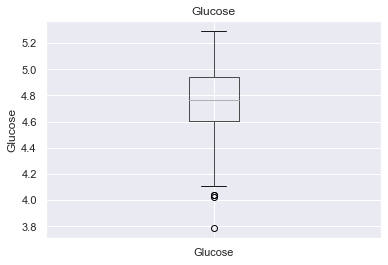

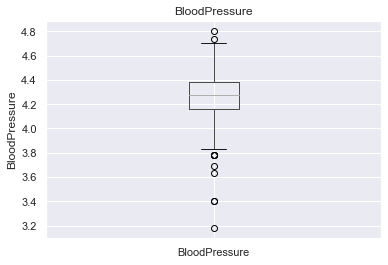

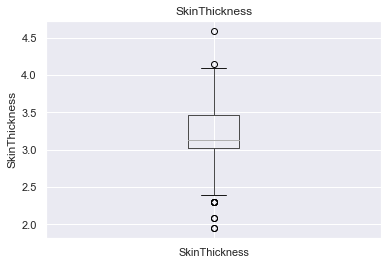

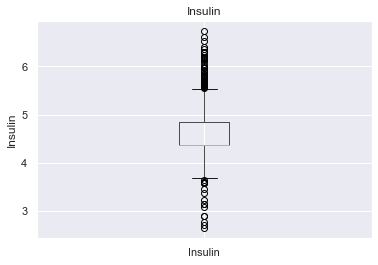

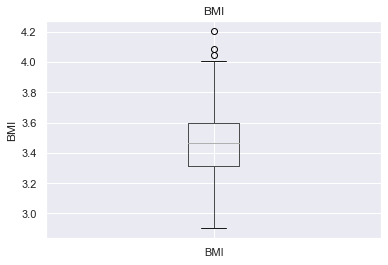

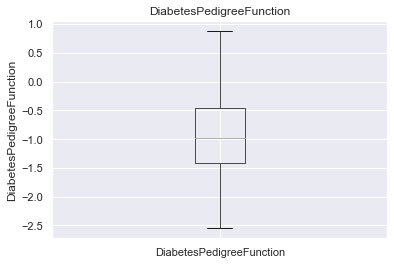

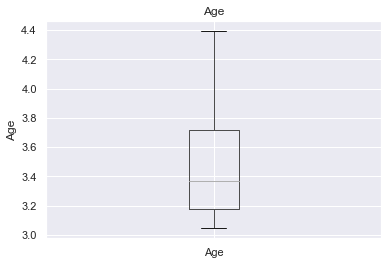

In [14]:
for feature in db.columns:
    data=db.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

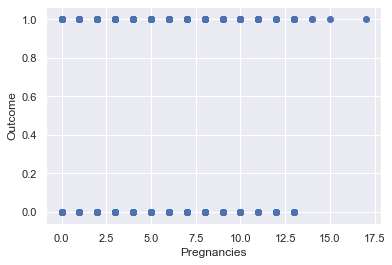

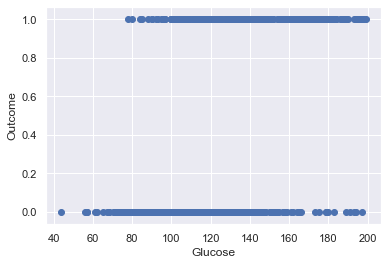

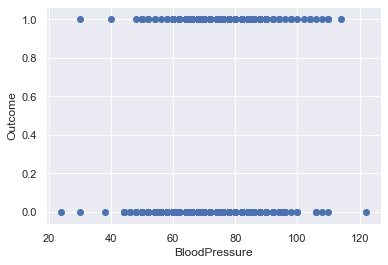

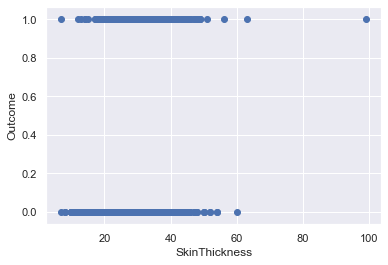

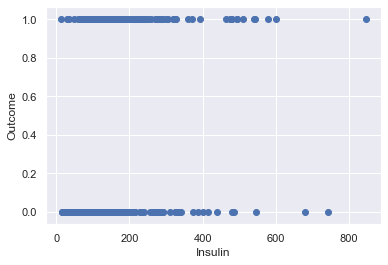

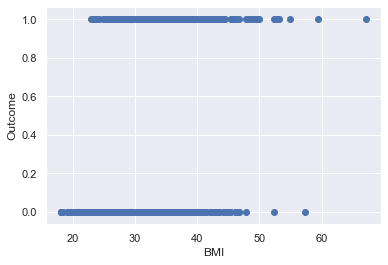

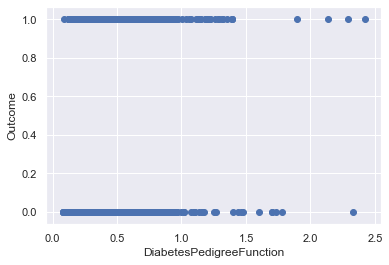

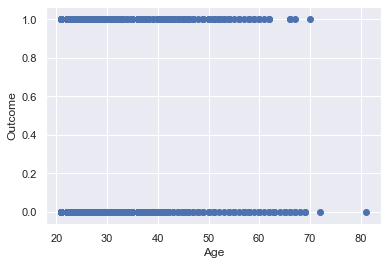

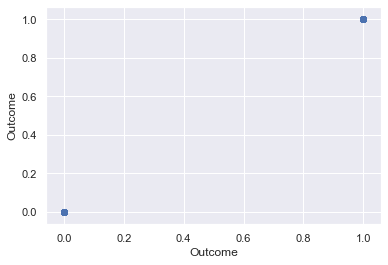

In [15]:
for feature in db.columns:
        plt.scatter(db[feature],db['Outcome'])
        plt.xlabel(feature)
        plt.ylabel('Outcome')
        plt.show()

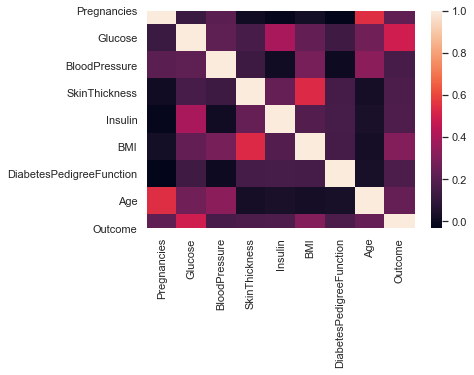

In [16]:
sns.heatmap(db.corr())

In [17]:
df=db.copy()
x=df.iloc[:,:-1]
y=df['Outcome']

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
ordered_rank_features=SelectKBest(score_func=chi2,k='all')
ordered_features=ordered_rank_features.fit(x,y)

In [20]:
ordered_features

SelectKBest(k='all', score_func=<function chi2 at 0x0000016940F50168>)

In [21]:
dfscores=pd.DataFrame(ordered_features.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(x.columns)

In [22]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [23]:
features_rank.columns=['Features','Score']

In [24]:
features_rank

,Features,Score
0,Pregnancies,111.519691
1,Glucose,1418.660636
2,BloodPressure,41.394665
3,SkinThickness,81.917622
4,Insulin,1798.088682
5,BMI,108.937867
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [25]:
features_rank.nlargest(8,'Score')

,Features,Score
4,Insulin,1798.088682
1,Glucose,1418.660636
7,Age,181.303689
0,Pregnancies,111.519691
5,BMI,108.937867
3,SkinThickness,81.917622
2,BloodPressure,41.394665
6,DiabetesPedigreeFunction,5.392682


In [26]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016941BE5048>,
      dtype=object)

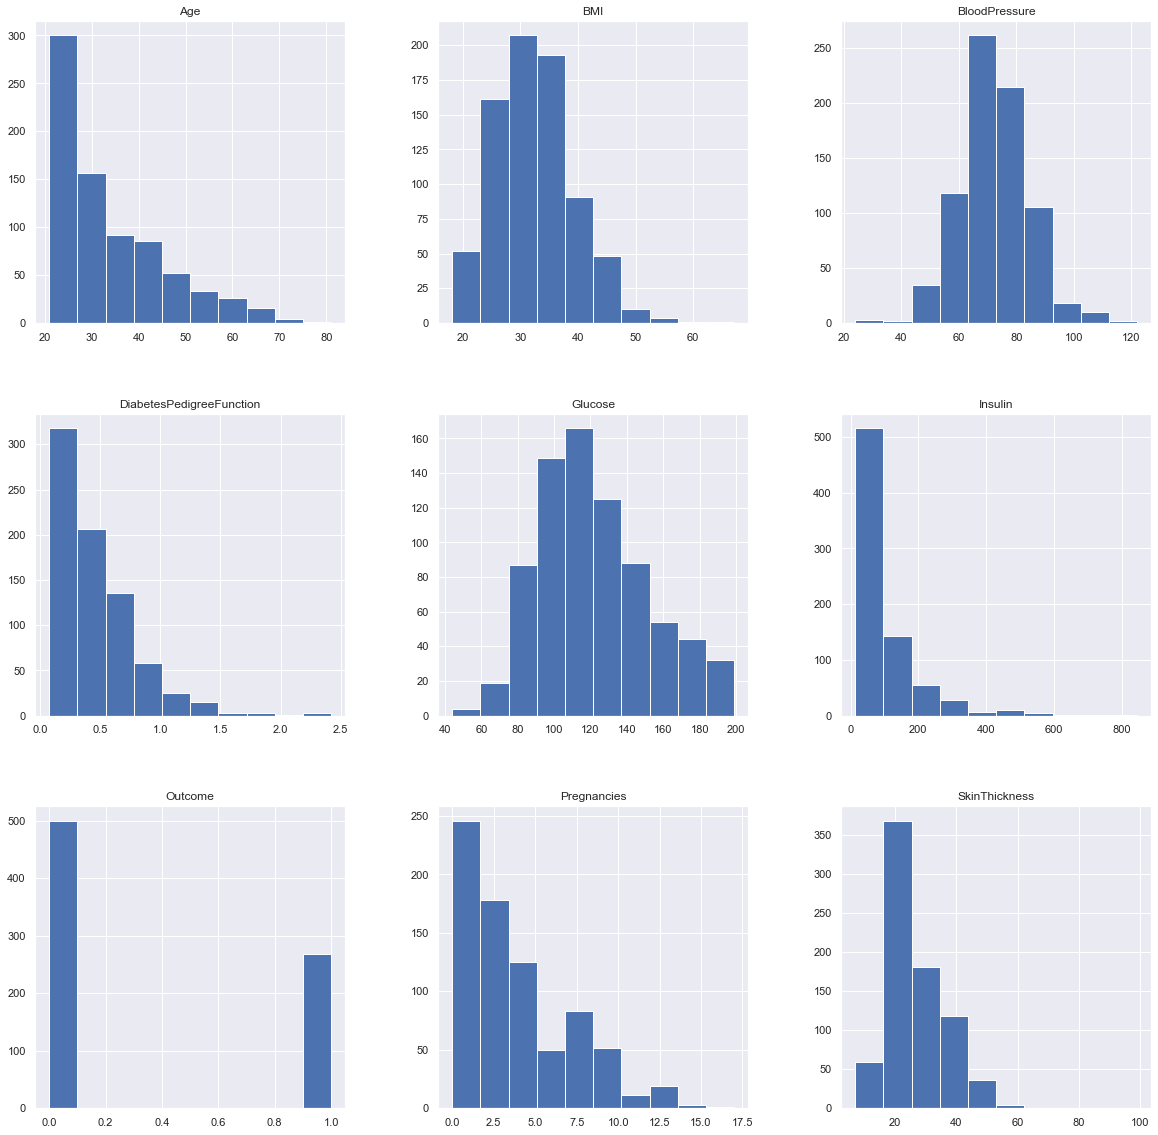

In [27]:
db.hist(figsize = (20,20))

# Logistic Regression

In [28]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [29]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 355)

In [31]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [33]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [34]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [35]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [36]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [37]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.88

In [38]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.7746478873239436

In [39]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8239700374531835

In [40]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

# Decision Tree

In [41]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
print(feature_name)
print(class_name)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[1, 0]


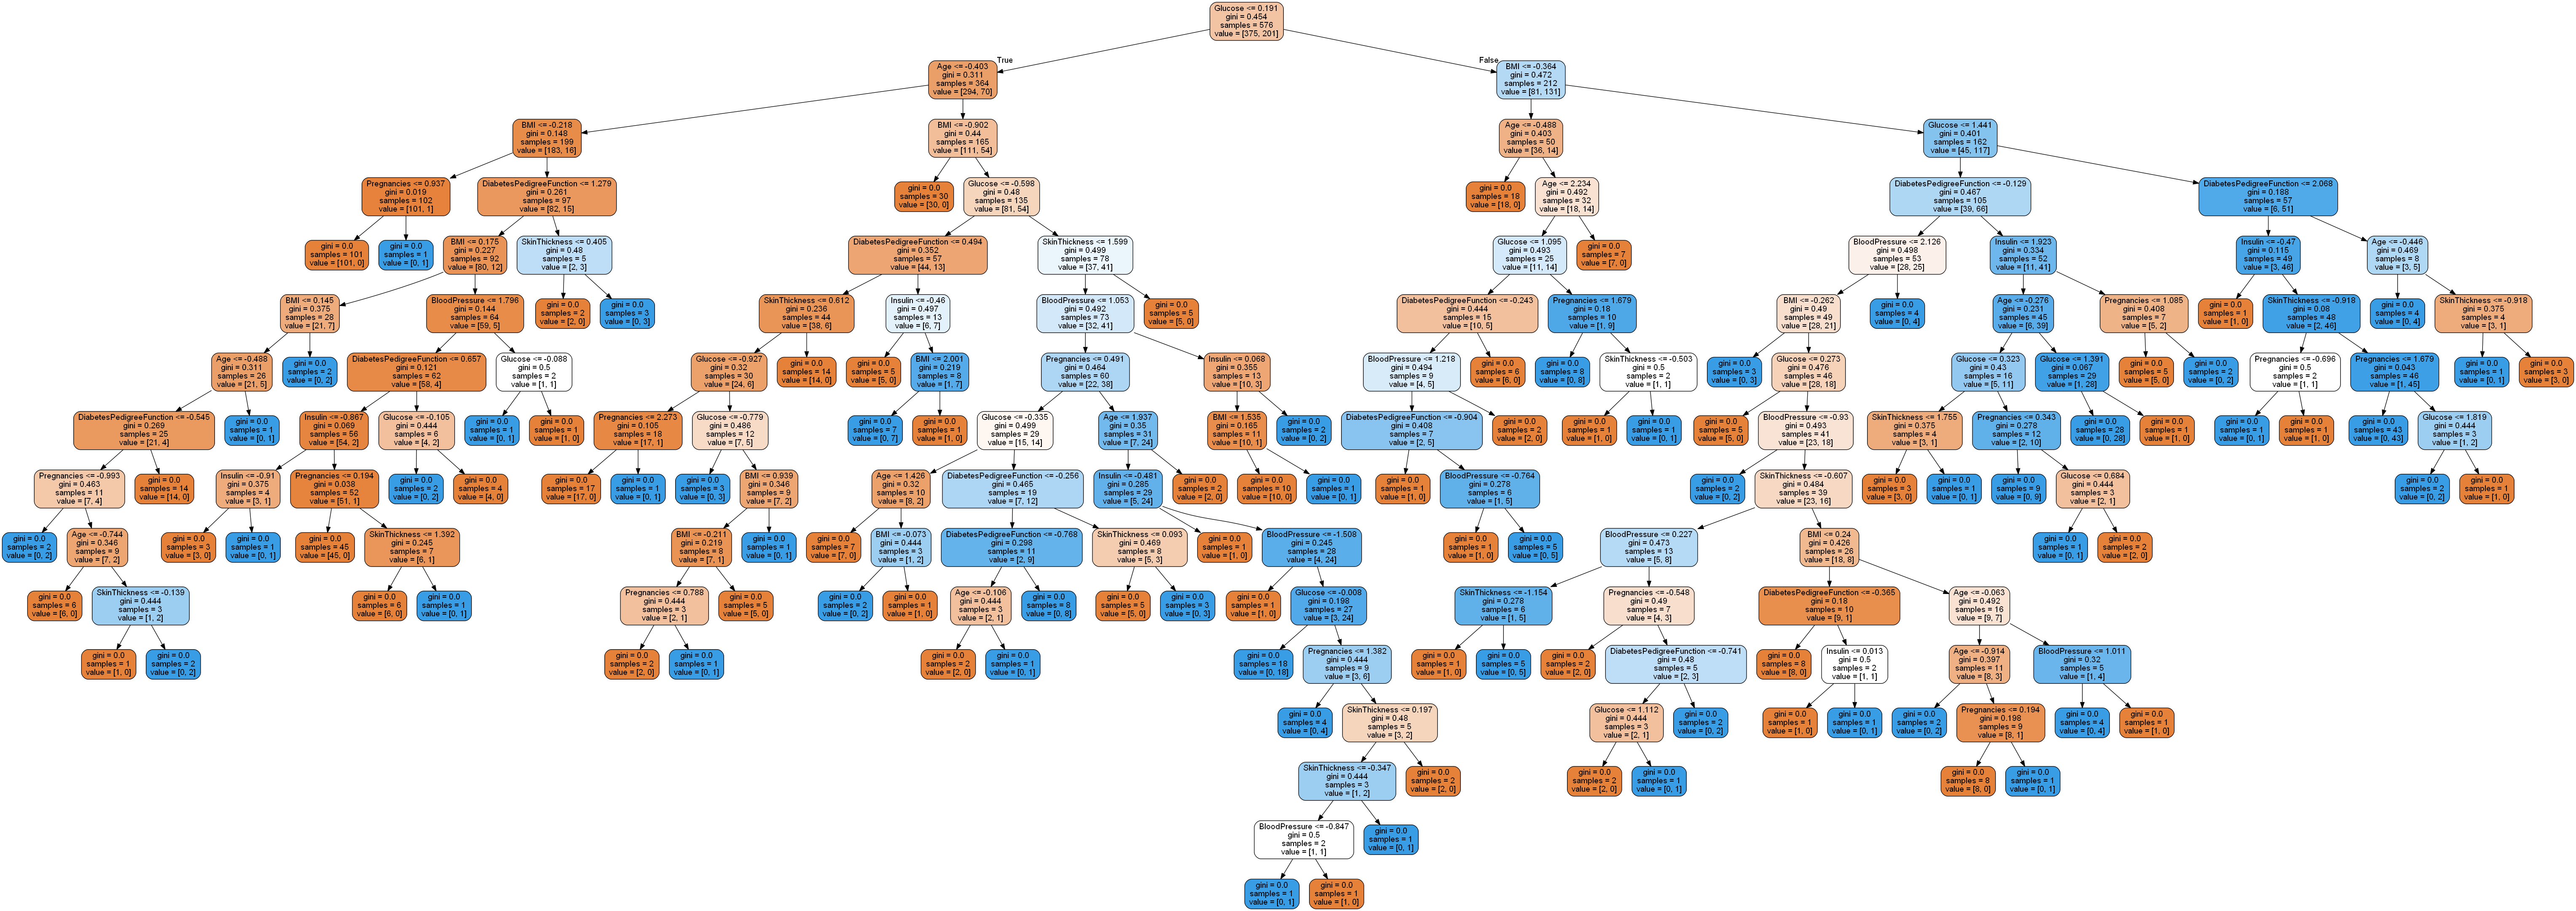

In [43]:
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [44]:
clf.score(x_train,y_train)

1.0

In [45]:
py_pred = clf.predict(x_test)
py_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [46]:
clf.score(x_test,y_test)

0.6979166666666666

In [47]:
auc = roc_auc_score(y_test, py_pred)
auc

0.6675820895522387

# GridSearchCV

In [48]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [49]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [50]:
grid_search.fit(x_train,y_train)

C:\Users\Sameer\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 9, 'min_samples_split': 6, 'splitter': 'random'}


In [52]:
grid_search.best_score_

0.7777777777777778

In [53]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =24, min_samples_leaf= 5, min_samples_split= 6, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=24,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [54]:
clf.score(x_train,y_train)

0.8211805555555556

In [55]:
clf.score(x_test,y_test)

0.7239583333333334

In [56]:
py_pred_grid = clf.predict(x_test)
py_pred_grid

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [57]:
auc = roc_auc_score(y_test, py_pred_grid)
auc

0.6702686567164178

In [58]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
print(feature_name)
print(class_name)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[1, 0]


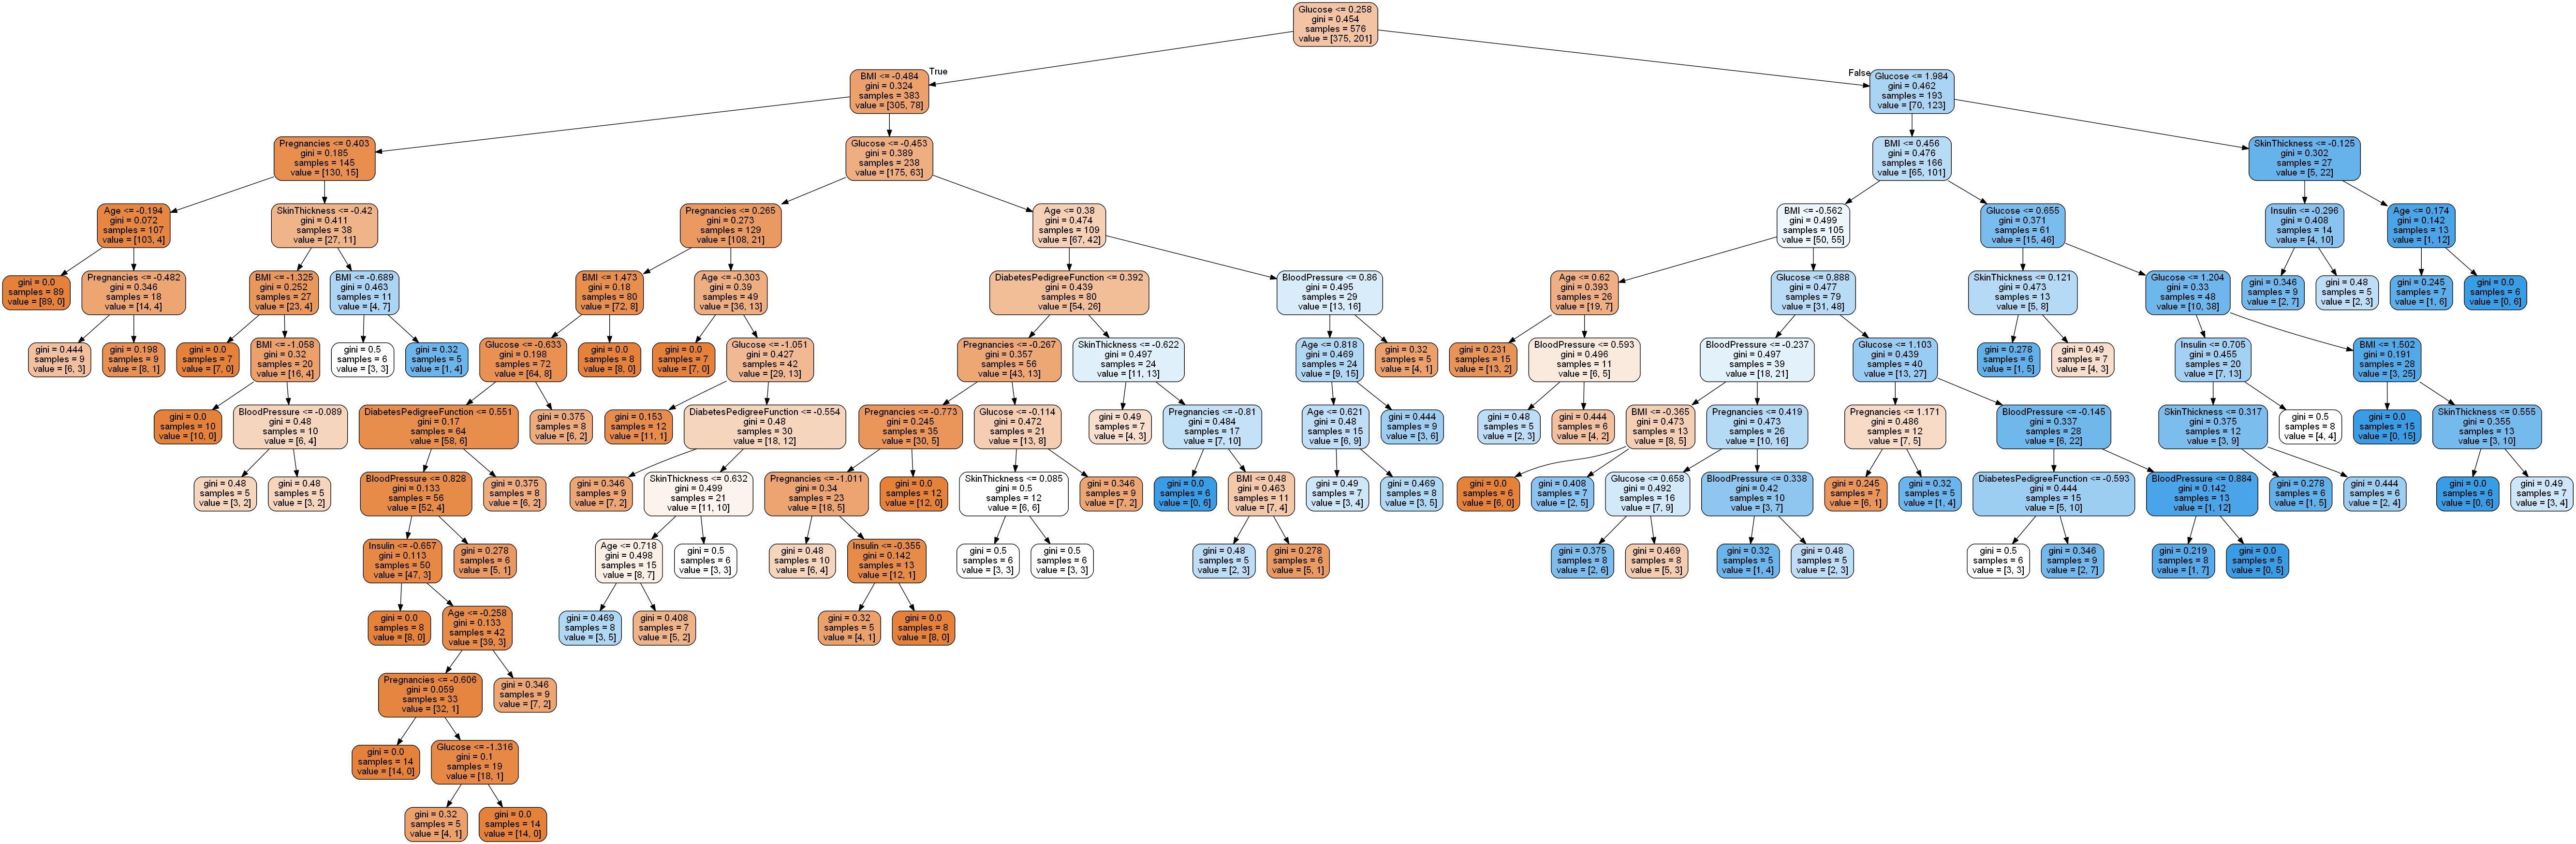

In [59]:
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

# Random Forest

In [61]:
rand_clf = RandomForestClassifier(random_state=6)

In [62]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [64]:
rand_clf.score(x_train,y_train)

0.984375

In [63]:
rand_clf.score(x_test,y_test)

0.71875

In [68]:
grid_param = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth' : range(2,32,1),
#     'min_samples_leaf' : range(1,10,1),
#     'min_samples_split': range(2,10,1),
#     'splitter' : ['best', 'random']
    
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
    
}

In [69]:
grid_search = GridSearchCV(estimator=rand_clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [70]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


In [72]:
rand_clf = RandomForestClassifier(criterion= 'gini',
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 10,random_state=6)

In [73]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [74]:
rand_clf.score(x_train,y_train)

0.9652777777777778

In [75]:
rand_clf.score(x_test,y_test)

0.734375